# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.

dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
# Descritiva dos dados
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


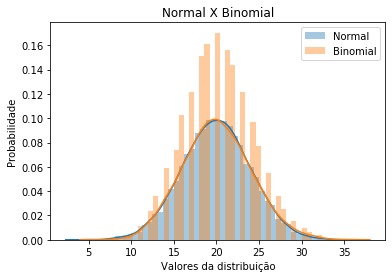

In [6]:
sns.distplot(dataframe.normal,hist=True, label="Normal")
sns.distplot(dataframe.binomial,hist=True, label="Binomial")
plt.xlabel('Valores da distribuição')
plt.ylabel('Probabilidade')
plt.title('Normal X Binomial')
plt.legend();

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [7]:
def q1():
    q1_norm, q2_norm, q3_norm = dataframe.normal.quantile([0.25, 0.5, 0.75])
    q1_binom, q2_binom, q3_binom = dataframe.binomial.quantile([0.25, 0.5, 0.75])
    
    diferenca = (round(q1_norm - q1_binom,3), round(q2_norm - q2_binom,3), round(q3_norm - q3_binom,3))
    
    return diferenca
q1()


(0.31, -0.01, -0.316)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

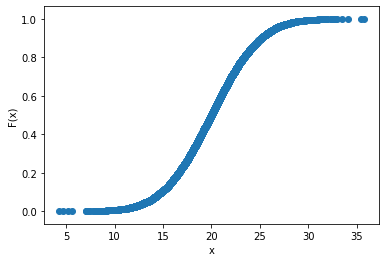

In [8]:
# Gráfico função de distribuição acumulada empírica (ECDF)
ecdf = ECDF(dataframe.normal)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.scatter(ecdf.x, ecdf.y);

In [9]:
def q2():
    #CDF empírica
    ecdf = ECDF(dataframe.normal)
    
    #média e desvio
    media = dataframe.normal.mean()
    desvio = dataframe.normal.std()
    prob = ecdf(media + desvio) - ecdf(media - desvio)
    return round(prob,3)
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [10]:
def q3():
    # Media e Variância (Normal)
    m_norm = dataframe.normal.mean()
    v_norm = dataframe.normal.var()
    
    # Media e Variância (Normal)
    m_binom = dataframe.binomial.mean()
    v_binom = dataframe.binomial.var()
    
    #Diferença entre as médias e as variâncias
    
    return (round(m_binom - m_norm,3), round(v_binom - v_norm,3))
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [21]:
stars = pd.read_csv("pulsar_stars.csv")

In [22]:
stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [23]:
# Sua análise da parte 2 começa aqui.
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [24]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


In [25]:
#Dimensão dos dados
stars.shape

(17897, 9)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

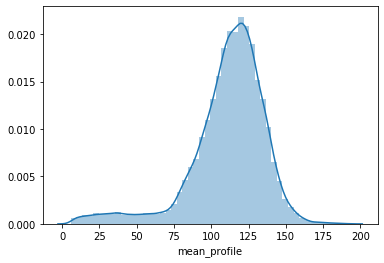

In [26]:
# variável mean_profile antes de normalizar
sns.distplot(stars['mean_profile']);

In [27]:
def q4():
    # Filtrando as variáveis onde target=0
    stars_filtro = stars[stars['target']==0]['mean_profile']
    
    # Padronizando 'mean_profile'
    false_pulsar_mean_profile_standardized = (stars_filtro - stars_filtro.mean()) / stars_filtro.std()
    
    # quantis teóricos
    Q_80, Q_90, Q_95 = sct.norm.ppf([0.80,0.90,0.95])
    
    # ECDF
    ecdf = ECDF(false_pulsar_mean_profile_standardized) 
    
    return (round(ecdf(Q_80),3),round(ecdf(Q_90),3),round(ecdf(Q_95),3))
q4()

(0.806, 0.911, 0.959)

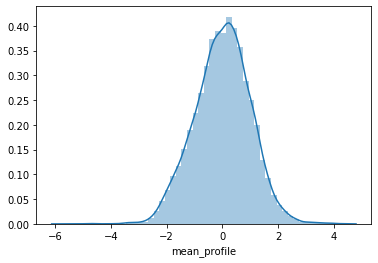

In [28]:
# Após a padronização, temos:
stars_filtro = stars[stars['target']==0]['mean_profile']
false_pulsar_mean_profile_standardized = (stars_filtro - stars_filtro.mean()) / stars_filtro.std()

sns.distplot(false_pulsar_mean_profile_standardized);

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [29]:
def q5():
    
    #filtrando e padronizando
    stars_filtro = stars[stars['target'] == 0]['mean_profile']
    false_pulsar_mean_profile_standardized = (stars_filtro - stars_filtro.mean()) / stars_filtro.std()
    #os quartis da false_pulsar:
    Q1_pulsar, Q2_pulsar, Q3_pulsar = false_pulsar_mean_profile_standardized.quantile([0.25,0.5,0.75])
    #os quartis da normal:
    Q1_norm = sct.norm.ppf(0.25)
    Q2_norm = sct.norm.ppf(0.50)
    Q3_norm = sct.norm.ppf(0.75)
    return (round(Q1_pulsar-Q1_norm,3),round(Q2_pulsar-Q2_norm,3),round(Q3_pulsar-Q3_norm,3))
    

q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.